<a href="https://colab.research.google.com/github/Oviyabalamurugan/App-Store-app-Analysis/blob/main/cb.en.u4cse19341.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time Series Assignment -Electric Production Dataset:

Data Set Link: https://www.kaggle.com/datasets/shenba/time-series-datasets?resource=download

CB.EN.U4CSE19341

Oviya B

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.figure as figure

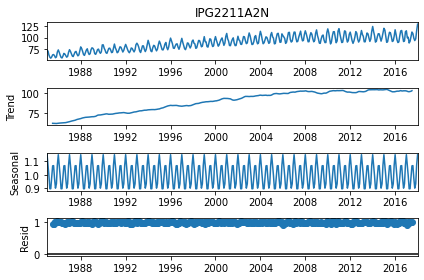

In [3]:
# multiplicative decompose time series
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = read_csv('/Electric_Production.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
result = seasonal_decompose(series, model='multiplicative')
result.plot()
pyplot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


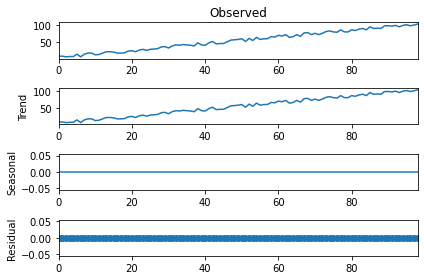

In [4]:
# additive decompose a contrived additive time series
from random import randrange
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i+randrange(10) for i in range(1,100)]
result = seasonal_decompose(series, model='additive', freq=1)
result.plot()
pyplot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """


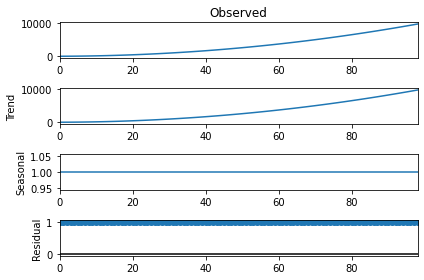

In [5]:
# multiplicative decompose a contrived multiplicative time series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(series, model='multiplicative', freq=1)
result.plot()
pyplot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


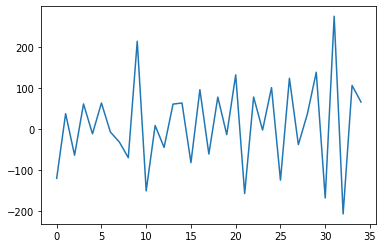

In [26]:
# detrend a time series using differencing
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('/Electric_Production.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
X = series.values
diff = list()
for i in range(1, len(X)):
	value = X[i] - X[i - 1]
	diff.append(value)
pyplot.plot(diff)
pyplot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


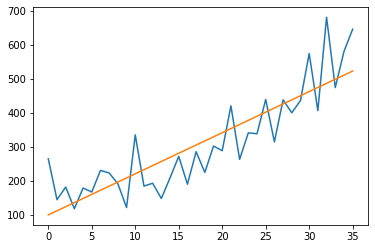

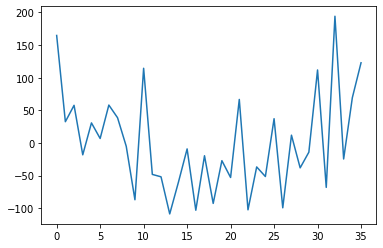

In [27]:
# use a linear model to detrend a time series
from pandas import read_csv
from pandas import datetime
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import numpy

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('/Electric_Production.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
# fit linear model
X = [i for i in range(0, len(series))]
X = numpy.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
pyplot.plot(y)
pyplot.plot(trend)
pyplot.show()
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]
# plot detrended
pyplot.plot(detrended)
pyplot.show()